In [1]:
print()

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
import ndjson

In [5]:
import tensorflow as tf

2023-10-29 11:09:14.260181: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [6]:
import time

In [7]:
from sklearn.model_selection import KFold

In [8]:
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

In [10]:
from scipy.optimize import curve_fit

In [11]:
import pickle

In [12]:
# read and extract "word" & "drawing"
def process_ndjson_file(file_path):
    drawing_data = []

    with open(file_path, 'r') as file:
        reader = ndjson.reader(file)
        for entry in reader:
            drawing = entry["strokes"]
            # print(entry)
            # Append word label and drawing data to their respective lists
            drawing_data.append(drawing)
    return drawing_data


In [13]:
np.clip(2 -2,1,100)

1

In [14]:
np.linspace(0,-5,6)

array([ 0., -1., -2., -3., -4., -5.])

In [15]:
def get_images_per_class(dd, ns = 54, last_one = False, fix = False):
    all_strok_images = []
    for i_i, images in enumerate(dd):
    #     print('image', i_i)
        num_strokes = len(images)
        all_strok_images.append(np.zeros((num_strokes, ns, ns), dtype=int))
        x_org, y_org = [], []
        
        for i_s, stroke in enumerate(images):
            
            if fix == True:
                stroke_x = np.array(stroke[0])
                stroke_y = np.array(stroke[1])
                x_stroke = stroke_x[:]
                y_stroke = stroke_y[:]
                len_stroke = len(stroke_x)
                
                xn = []
                yn = []
                for i in range(len_stroke - 1):
                    if (x_stroke[i+1] - x_stroke[i]) >= (y_stroke[i+1] - y_stroke[i]):
                        ran = int(x_stroke[i+1] - x_stroke[i])
                        x_save = x_stroke[i] + np.linspace(0, ran, np.abs(ran))
                        otro_ran = np.clip(y_stroke[i+1] - y_stroke[i], 1, 1000)
                        y_save = (((x_save - x_stroke[i] )/ran)*(otro_ran)) + y_stroke[i]
                        y_save = list(np.round(y_save, 0 ).astype(int))
                            
                    else:
                        ran = int(y_stroke[i+1] - y_stroke[i])
                        y_save = y_stroke[i] + np.linspace(0, ran, np.abs(ran))
                        otro_ran = np.clip(x_stroke[i+1] - x_stroke[i], 1, 1000)
                        x_save = (((y_save - y_stroke[i] )/ran)*(otro_ran)) + x_stroke[i]
                        x_save = list(np.round(x_save, 0 ).astype(int))
                        
                    
                    
                    xn.extend(x_save)
                    yn.extend(y_save)
                    
                x_save = [x_stroke[-1]]
                y_save = [y_stroke[-1]]
                
                xn.extend(x_save)
                yn.extend(y_save)
                
                stroke_x = xn[:]
                stroke_y = yn[:]
                
                x_org.extend(list(stroke_x))
                y_org.extend(list(stroke_y))
                
#                 print(stroke_x)
#                 print(stroke[0])
#                 break
            else:

                x_org.extend(stroke[0][:])
                y_org.extend(stroke[1][:])


            mms_x = MinMaxScaler()
            mms_x.fit(np.array(x_org).reshape(-1,1))

            mms_y = MinMaxScaler()
            mms_y.fit(np.array(y_org).reshape(-1,1))


            x_final = np.round(mms_x.transform(np.array(x_org).reshape(-1,1)).ravel()*(ns-1)).astype(int)
            y_final = np.round(mms_y.transform(np.array(y_org).reshape(-1,1)).ravel()*(ns-1)).astype(int)
            
            all_strok_images[i_i][i_s][x_final, y_final] = 1
    return all_strok_images
            
#             if fix == True:
#                 xs_it = stroke[0][:]
#                 ys_it = stroke[1][:]
                
#                 xs_it = np.round(mms_x.transform(np.array(xs_it).reshape(-1,1)).ravel()*(ns-1)).astype(int)
#                 ys_it = np.round(mms_y.transform(np.array(ys_it).reshape(-1,1)).ravel()*(ns-1)).astype(int)
                
#                 size_it = len(xs_it)
#                 for i in range(1,size_it):
#                     if xs_it[i] - xs_it[i - 1] > 1:
#                         x_add = np.arange(xs_it[i - 1], xs_it[i])
#                         for ii in range(len(x_add)):
#                             y_add = ys[i-1] + (ys[i]-ys[i-1])*x_add[ii]/(xs_it[i]-xs_it[i])

In [16]:
dd = process_ndjson_file('thon_data/cats.ndjson')

In [17]:
fixed = get_images_per_class(dd, ns= 24, fix= True)

In [18]:
no_fixed = get_images_per_class(dd, ns= 24, fix= False)

yes


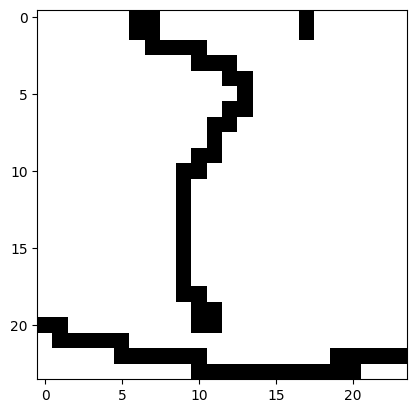

no


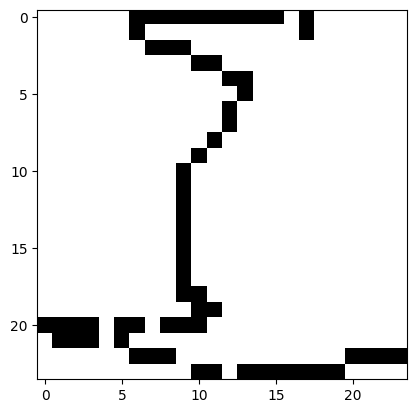

yes


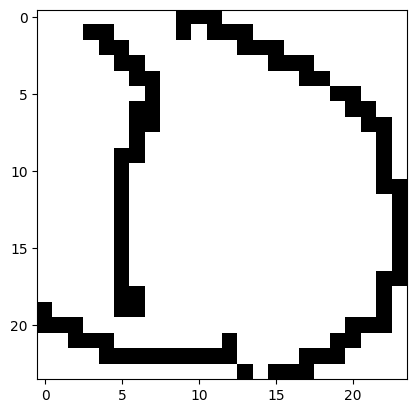

no


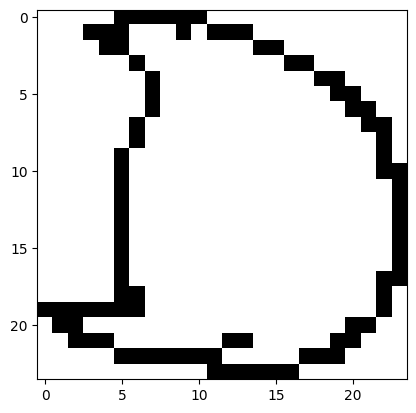

yes


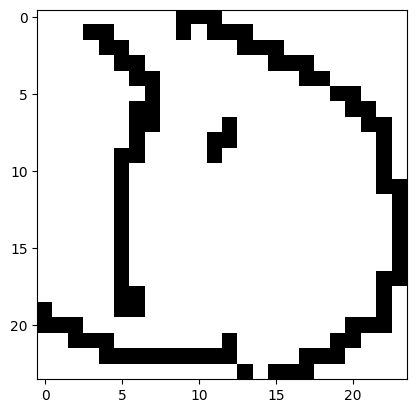

no


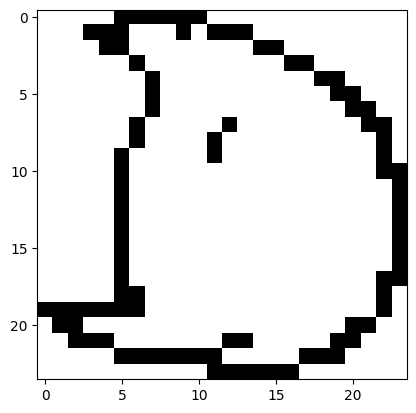

yes


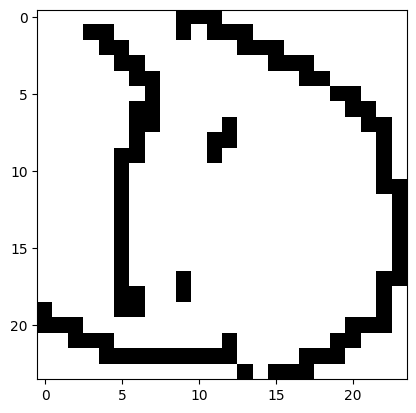

no


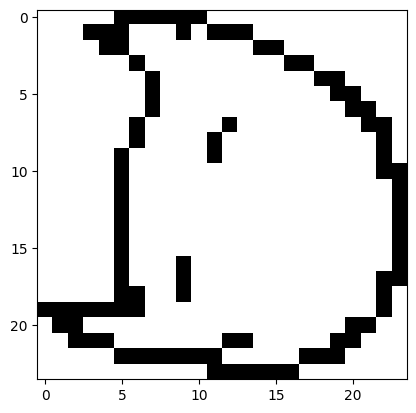

yes


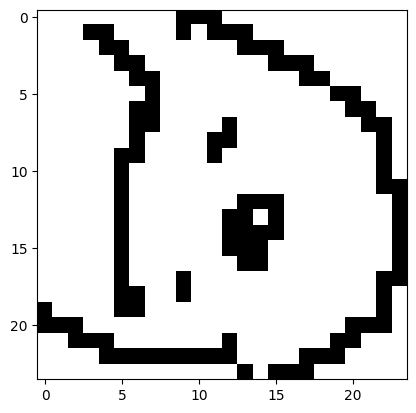

no


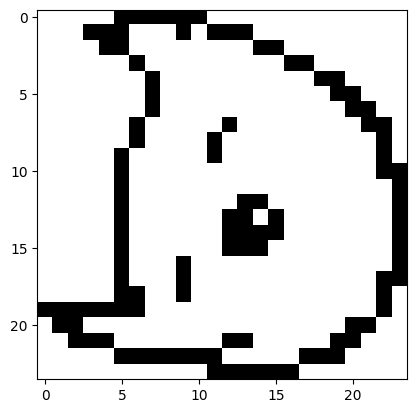

yes


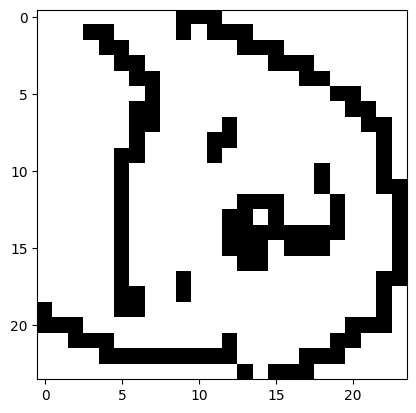

no


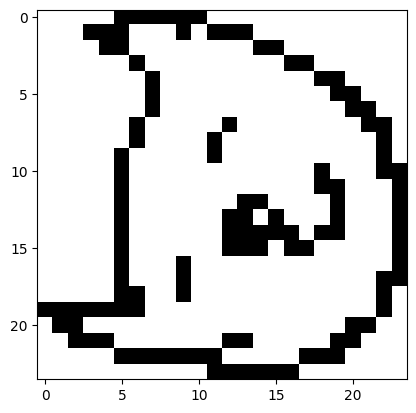

yes


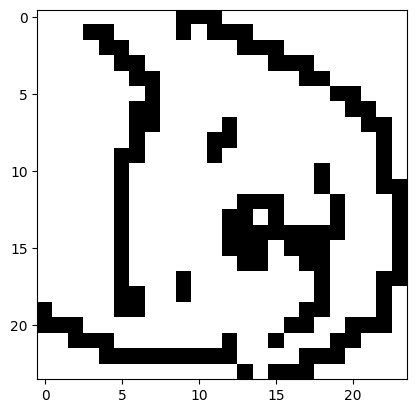

no


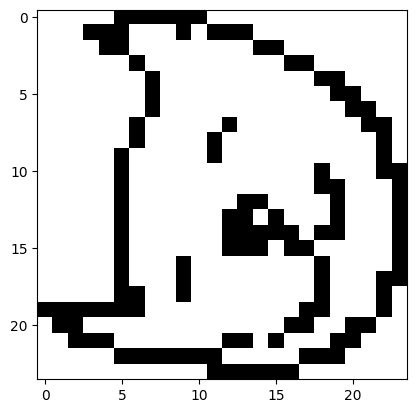

yes


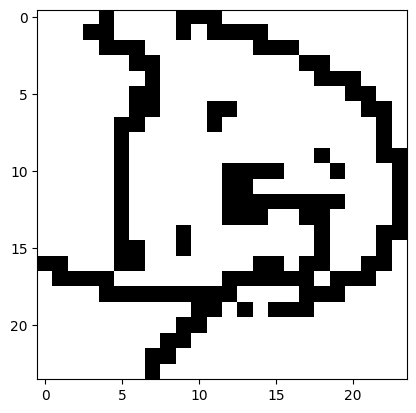

no


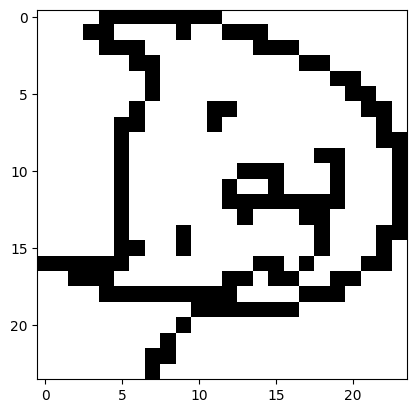

yes


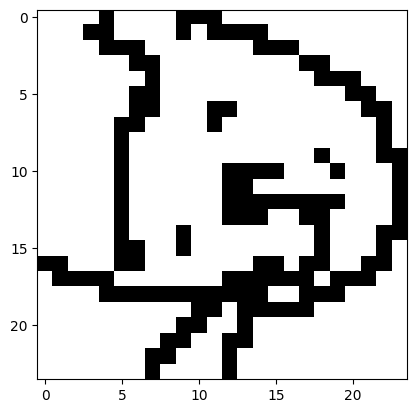

no


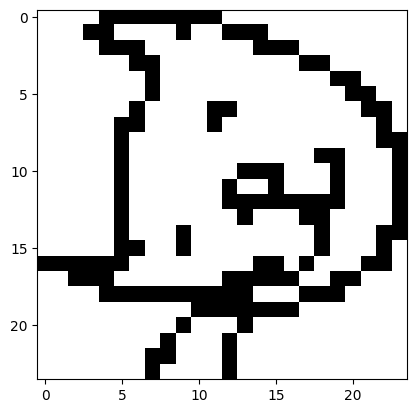

yes


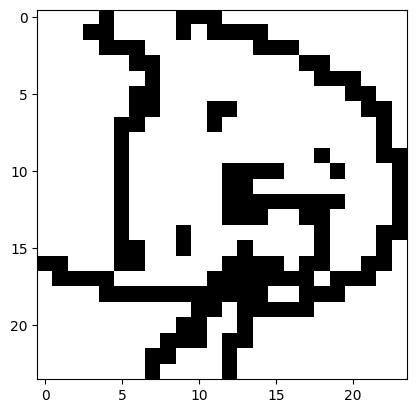

no


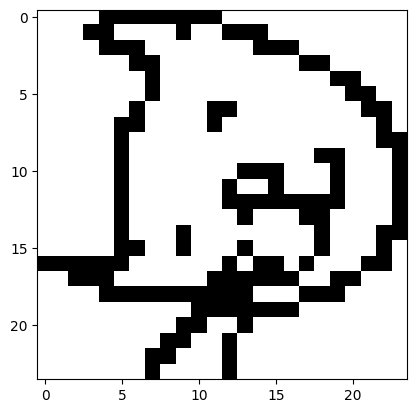

yes


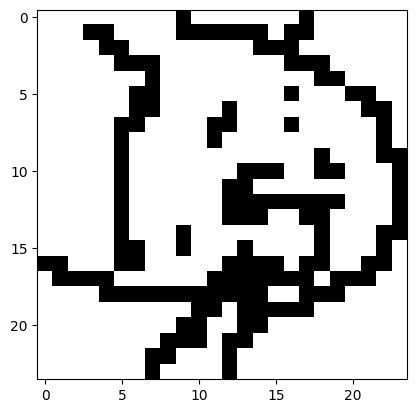

no


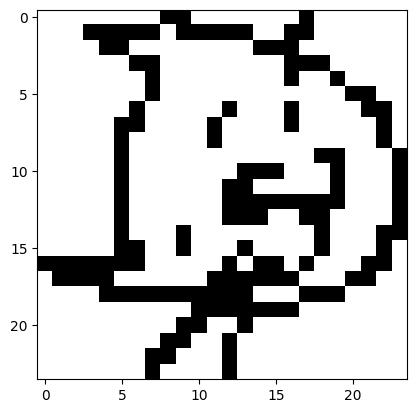

yes


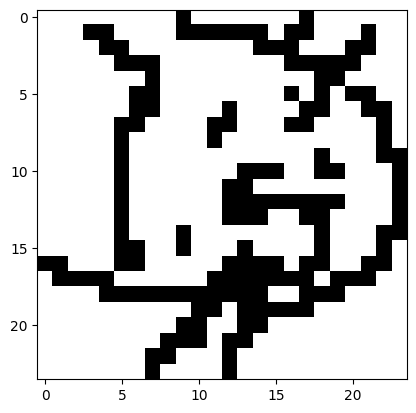

no


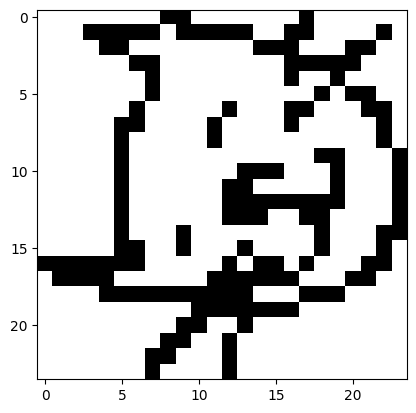

In [19]:
cf = 120
for i,j in zip(fixed[cf], no_fixed[cf]):
    print('yes')
    plt.imshow(i, cmap='Greys')
    plt.show()
    print('no')
    plt.imshow(j, cmap='Greys')
    plt.show()

In [113]:
folder_path = 'thon_data/'
classes_text = [] 
classes_data = []
classes_marker = []
ns = 28

# Check if the folder exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    # List all files and subdirectories in the folder
    contents = os.listdir(folder_path)
    contents.sort()
    for n_label, item in enumerate(contents):
        item_path = os.path.join(folder_path, item)

        if os.path.isfile(item_path):
            # Process files
            print(f"File: {item_path}")
            file_size = os.path.getsize(item_path)
            classes_text.append(item_path.split('/')[-1].split('.')[0])
            
            print(f"Size: {file_size} bytes")
            classes_data.append(
                get_images_per_class(process_ndjson_file(item_path), ns = ns, fix= True)
            )
            classes_marker.append(np.ones(len(classes_data[-1]))* n_label)
        elif os.path.isdir(item_path):
            # Process subdirectories
            print(f"Directory: {item_path}")
        else:
            # Handle other types of items, if necessary
            print(f"Other: {item_path}")
else:
    print(f"The folder '{folder_path}' does not exist.")    

File: thon_data/accessory.ndjson
Size: 13393013 bytes
File: thon_data/cats.ndjson
Size: 1356878 bytes
File: thon_data/construction.ndjson
Size: 5244869 bytes
File: thon_data/fruit.ndjson
Size: 10954101 bytes
File: thon_data/instrument.ndjson
Size: 15989281 bytes
File: thon_data/one_liner.ndjson
Size: 1776031 bytes
File: thon_data/plant.ndjson
Size: 12352687 bytes
File: thon_data/shape.ndjson
Size: 3354072 bytes
File: thon_data/sport.ndjson
Size: 10003148 bytes
File: thon_data/terrain.ndjson
Size: 6281535 bytes
File: thon_data/tool.ndjson
Size: 10674991 bytes
File: thon_data/vehicle.ndjson
Size: 19934180 bytes
File: thon_data/weapon.ndjson
Size: 3591614 bytes
File: thon_data/weather.ndjson
Size: 8596646 bytes
File: thon_data/writing_utensil.ndjson
Size: 4582119 bytes


In [114]:
print(len(classes_data))
print(len(classes_data[0]))
print(len(classes_data[0][0]))
print(len(classes_data[0][0][0]))
print(len(classes_data[0][0][0][0]))


15
4631
2
28
28


In [117]:
with open('classes_data.pkl', 'wb') as file:
    pickle.dump(classes_data, file)

In [118]:
work_data = np.concatenate(classes_data)
work_lab = np.concatenate(classes_marker)

size_data = len(work_lab)

size_data

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


44197

In [119]:
dims = len(classes_data)
lens_classes = [len(i) for i in classes_data]
lens_classes
cumu_classes = [int(np.sum(lens_classes[:i])) for i in range(dims)]
cumu_classes

[0,
 4631,
 5051,
 6817,
 10891,
 15356,
 16786,
 20777,
 23074,
 26871,
 29165,
 33156,
 37937,
 39246,
 42389]

In [120]:

# train_cv, test_cv= [[] for i in range(5)],[[] for i in range(5)]

# for i in range(dims):
#     kf = KFold(5)
#     for j, (train_index, test_index) in enumerate(kf.split(np.arange(lens_classes[i]))):
        
#         train_ite, test_ite = train_test_split(np.arange(lens_classes[i]))
#         train_cv[j].append(train_ite+cumu_classes[i])
#         test_cv[j].append(test_ite+cumu_classes[i])
        
        
# for j in range(5):        
#     train_cv[j]=np.concatenate(train_cv[j])
#     test_cv[j]=np.concatenate(test_cv[j])

In [121]:
## break data evenly, not enough for full random
train_, test_, val_ = [],[],[]
for i in range(dims):
    X_ite, test_ite = train_test_split(np.arange(lens_classes[i]), train_size= 0.9, random_state=46, shuffle=True)
    train_ite, val_ite = train_test_split(X_ite, train_size= (.7/.9), random_state=42, shuffle=True)
    train_.append(train_ite+cumu_classes[i])
    test_.append(test_ite+cumu_classes[i])
    val_.append(val_ite+cumu_classes[i])
    print('[', len(train_ite),'\t', len(test_ite),'\t',len(val_ite),']\t')
train_=np.concatenate(train_)
test_=np.concatenate(test_)
val_=np.concatenate(val_)

[ 3240 	 464 	 927 ]	
[ 293 	 42 	 85 ]	
[ 1235 	 177 	 354 ]	
[ 2851 	 408 	 815 ]	
[ 3125 	 447 	 893 ]	
[ 1000 	 143 	 287 ]	
[ 2792 	 400 	 799 ]	
[ 1607 	 230 	 460 ]	
[ 2657 	 380 	 760 ]	
[ 1605 	 230 	 459 ]	
[ 2792 	 400 	 799 ]	
[ 3345 	 479 	 957 ]	
[ 916 	 131 	 262 ]	
[ 2199 	 315 	 629 ]	
[ 1265 	 181 	 362 ]	


In [122]:
print(len(train_))
print(len(test_))
print(len(val_))

30922
4427
8848


In [123]:
data_train = work_data[train_].copy()
label_train = work_lab[train_].copy()
data_val = work_data[val_].copy()
label_val = work_lab[val_].copy()
data_test = work_data[test_].copy()
label_test = work_lab[test_].copy()

In [124]:
label_train

array([ 0.,  0.,  0., ..., 14., 14., 14.])

In [125]:
print(len(data_train))
print(len(data_train[0]))
print(len(data_train[0][0]))


30922
5
28


In [126]:
def concatenate_last(array_d, array_l, last):
    return np.concatenate([i[-last:] if len(i)>=last else i for i in array_d]), \
        np.concatenate([[array_l[i]]*last if len(array_d[i]) >= last else 
                        [array_l[i]]*len(array_d[i]) for i,_ in enumerate(array_d)])

In [127]:
la = 1000
d_train, l_train = concatenate_last(data_train, label_train, la)
d_test, l_test = concatenate_last(data_test, label_test, la)
d_val, l_val = concatenate_last(data_val, label_val, la)
d_train, l_train = tf.convert_to_tensor(d_train), tf.convert_to_tensor(l_train)
d_test, l_test = tf.convert_to_tensor(d_test), tf.convert_to_tensor(l_test)
d_val, l_val = tf.convert_to_tensor(d_val), tf.convert_to_tensor(l_val)

2023-10-29 07:18:38.063858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [128]:
dim_learning_rate = Real(low=1e-6, high=1e-2, prior='log-uniform',
                         name='learning_rate')
dim_num_dense_layers = Integer(low=1, high=5, name='num_dense_layers')
dim_num_dense_nodes = Integer(low=5, high=124, name='num_dense_nodes')
batch_size = Integer(low=100, high=2000, name='batch_size')

dimensions = [dim_learning_rate,
              dim_num_dense_layers,
              dim_num_dense_nodes,
             batch_size]


In [129]:
def fitness(dimensions):
    ti= time.time()
    print(dimensions)
    dim_learning_rate, dim_num_dense_layers, dim_num_dense_nodes, batch_size = dimensions
    model = Sequential()


    model.add(Flatten(input_shape=(ns,ns)))


    for i in range(dim_num_dense_layers):
        model.add(Dense(dim_num_dense_nodes, activation='relu'))

    model.add(Dense(15))


    model.compile(
        optimizer=tf.keras.optimizers.Adam(dim_learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    )


    print(model.summary())
    his = model.fit(x = d_train, y = l_train,
        epochs=200,
        batch_size=batch_size,
        validation_data=(d_val, l_val),
        verbose=0
    )
    print('loss', his.history['loss'][-1] )
    print('val_loss', his.history['val_loss'][-1] )
    print(time.time() - ti, 's')
    return (his.history['val_loss'][-1])**2

In [130]:
result = gp_minimize(fitness, dimensions, n_calls=50, random_state=42)

[0.001535224694197351, 2, 98, 1234]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 98)                76930     
                                                                 
 dense_1 (Dense)             (None, 98)                9702      
                                                                 
 dense_2 (Dense)             (None, 15)                1485      
                                                                 
Total params: 88,117
Trainable params: 88,117
Non-trainable params: 0
_________________________________________________________________
None
loss 0.5917085409164429
val_loss 6.087388515472412
105.40776300430298 s
[6.071989493441303e-05, 1, 60, 734]
Model: "sequential_1"
_____________

 dense_24 (Dense)            (None, 15)                1305      
                                                                 
Total params: 91,261
Trainable params: 91,261
Non-trainable params: 0
_________________________________________________________________
None
loss 1.080486536026001
val_loss 2.8119914531707764
161.77839875221252 s
[1.1299516083106616e-06, 5, 72, 832]
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 72)                56520     
                                                                 
 dense_26 (Dense)            (None, 72)                5256      
                                                                 
 dense_27 (Dense)            (None, 72)                5256      
  

Total params: 99,215
Trainable params: 99,215
Non-trainable params: 0
_________________________________________________________________
None
loss 1.29783034324646
val_loss 2.150402784347534
98.13553023338318 s
[5.042627283397418e-05, 1, 124, 2000]
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 124)               97340     
                                                                 
 dense_47 (Dense)            (None, 15)                1875      
                                                                 
Total params: 99,215
Trainable params: 99,215
Non-trainable params: 0
_________________________________________________________________
None
loss 1.4003828763961792
val_loss 2.095550060272217
81.465826

                                                                 
 dense_68 (Dense)            (None, 124)               97340     
                                                                 
 dense_69 (Dense)            (None, 15)                1875      
                                                                 
Total params: 99,215
Trainable params: 99,215
Non-trainable params: 0
_________________________________________________________________
None
loss 2.047348737716675
val_loss 2.1476259231567383
81.04964900016785 s
[1e-06, 5, 124, 2000]
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_70 (Dense)            (None, 124)               97340     
                                                                 
 dense_71 (Dense)

                                                                 
 dense_100 (Dense)           (None, 124)               15500     
                                                                 
 dense_101 (Dense)           (None, 15)                1875      
                                                                 
Total params: 161,215
Trainable params: 161,215
Non-trainable params: 0
_________________________________________________________________
None
loss 1.8877334594726562
val_loss 2.0736048221588135
124.48406147956848 s
[4.8815431832459185e-06, 5, 124, 2000]
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 784)               0         
                                                                 
 dense_102 (Dense)           (None, 124)               97340     
                                                              

 flatten_35 (Flatten)        (None, 784)               0         
                                                                 
 dense_132 (Dense)           (None, 124)               97340     
                                                                 
 dense_133 (Dense)           (None, 124)               15500     
                                                                 
 dense_134 (Dense)           (None, 124)               15500     
                                                                 
 dense_135 (Dense)           (None, 124)               15500     
                                                                 
 dense_136 (Dense)           (None, 124)               15500     
                                                                 
 dense_137 (Dense)           (None, 15)                1875      
                                                                 
Total params: 161,215
Trainable params: 161,215
Non-trainable params: 0
____

Total params: 147,103
Trainable params: 147,103
Non-trainable params: 0
_________________________________________________________________
None
loss 1.8121286630630493
val_loss 2.0541932582855225
121.49578714370728 s
[7.440243108522336e-06, 5, 113, 2000]
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_41 (Flatten)        (None, 784)               0         
                                                                 
 dense_168 (Dense)           (None, 113)               88705     
                                                                 
 dense_169 (Dense)           (None, 113)               12882     
                                                                 
 dense_170 (Dense)           (None, 113)               12882     
                                                                 
 dense_171 (Dense)           (None, 113)               12882   

 dense_200 (Dense)           (None, 117)               13806     
                                                                 
 dense_201 (Dense)           (None, 117)               13806     
                                                                 
 dense_202 (Dense)           (None, 117)               13806     
                                                                 
 dense_203 (Dense)           (None, 15)                1770      
                                                                 
Total params: 148,839
Trainable params: 148,839
Non-trainable params: 0
_________________________________________________________________
None
loss 1.8389259576797485
val_loss 2.0576064586639404
120.35396885871887 s
[6.797725778771632e-06, 5, 117, 2000]
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_47 (Flatten)        (None, 784)               0       

In [131]:
print(result.x)

[6.88360014529115e-06, 5, 117, 2000]


In [132]:
result

          fun: 4.17730505546956
            x: [6.88360014529115e-06, 5, 117, 2000]
    func_vals: [ 3.706e+01  4.864e+00 ...  4.247e+00  4.177e+00]
      x_iters: [[0.001535224694197351, 2, 98, 1234], [6.071989493441303e-05, 1, 60, 734], [3.727925903376984e-06, 4, 12, 1472], [0.005678201970293135, 1, 123, 1273], [0.0002796485951606247, 1, 8, 1097], [3.975977214318103e-05, 1, 121, 542], [2.3036990230378637e-06, 3, 51, 1968], [7.362945281639229e-05, 4, 86, 956], [1.1299516083106616e-06, 5, 72, 832], [1.1584172310543985e-06, 2, 34, 1398], [5.570068888511539e-05, 1, 55, 659], [0.0001814990185955424, 1, 5, 100], [0.0002446474927146931, 1, 5, 822], [4.9801403422161453e-05, 1, 49, 476], [4.7983927049080545e-05, 1, 5, 100], [5.093407763795318e-05, 1, 124, 1098], [5.042627283397418e-05, 1, 124, 2000], [4.787820573990243e-05, 1, 124, 2000], [0.0001429166408967447, 1, 124, 2000], [4.539427706144182e-05, 1, 124, 2000], [4.2905471390994256e-05, 1, 5, 2000], [2.7849481480004527e-06, 5, 124, 2000], 

In [133]:
classes_text

['accessory',
 'cats',
 'construction',
 'fruit',
 'instrument',
 'one_liner',
 'plant',
 'shape',
 'sport',
 'terrain',
 'tool',
 'vehicle',
 'weapon',
 'weather',
 'writing_utensil']

In [164]:
ti = time.time()
dimensions = result.x
print(dimensions)
dim_learning_rate, dim_num_dense_layers, dim_num_dense_nodes, batch_size = dimensions
model = Sequential()


model.add(Flatten(input_shape=(ns,ns)))


for i in range(dim_num_dense_layers):
    model.add(Dense(dim_num_dense_nodes, activation='relu'))

model.add(Dense(15))


model.compile(
    optimizer=tf.keras.optimizers.Adam(dim_learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)


print(model.summary())
his = model.fit(x = d_train, y = l_train,
    epochs=500,
    batch_size=batch_size,
    validation_data=(d_val, l_val),
    verbose=0
)
print('val_loss', his.history['val_loss'][-1] )
print(time.time() - ti, 's')


[6.88360014529115e-06, 5, 117, 2000]
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_52 (Flatten)        (None, 784)               0         
                                                                 
 dense_234 (Dense)           (None, 117)               91845     
                                                                 
 dense_235 (Dense)           (None, 117)               13806     
                                                                 
 dense_236 (Dense)           (None, 117)               13806     
                                                                 
 dense_237 (Dense)           (None, 117)               13806     
                                                                 
 dense_238 (Dense)           (None, 117)               13806     
                                                                 
 dense_239 (Dens

In [150]:
print('hi')

hi


In [151]:
print(his.history['loss'][-1])
print(np.min(his.history['loss']))
print(his.history['val_loss'][-1])
print(np.min(his.history['val_loss']))

1.6986205577850342
1.6986205577850342
2.05704665184021
2.0515358448028564


In [152]:
def get_res_per_class(dd, ns = 28, last_one = False):
    all_strok_images = []
    for i_i, images in enumerate(dd):
    #     print('image', i_i)
        num_strokes = len(images)
        x_org, y_org = [], []
        for i_s, stroke in enumerate(images):
            x_org.extend(stroke[0][:])
            y_org.extend(stroke[1][:])


            mms_x = MinMaxScaler()
            mms_x.fit(np.array(x_org).reshape(-1,1))

            mms_y = MinMaxScaler()
            mms_y.fit(np.array(y_org).reshape(-1,1))
            x_final = np.round(mms_x.transform(np.array(x_org).reshape(-1,1)).ravel()*(ns-1)).astype(int)
            
            y_final = np.round(mms_y.transform(np.array(y_org).reshape(-1,1)).ravel()*(ns-1)).astype(int)

            image_i = np.zeros((ns,ns),dtype = float)
            
            
            image_i[x_final, y_final] = 1.0
            # print(image_i)
            print(image_i.shape)
            break
        break
            

In [153]:
get_res_per_class(process_ndjson_file(item_path), ns = ns)

(28, 28)


In [154]:
def plot_class(d_data, l_data):
    y_pred = model.predict(d_data)
    y_p = np.argmax(y_pred, axis = 1)

    y_t = l_data.numpy()
    y_t = y_t.astype(int)
    n = 15
    arr_pred = np.zeros((n,n), dtype=float)
    for ni in range(n):
        ind_ = np.where(y_t == ni)
        work_it = y_p[ind_]

        size_it = len(work_it)
        if size_it > 0:

            for nj in range(n):
                this = np.where(work_it == nj)[0]
                arr_pred[ni, nj] =  len(this)/size_it
        else:
            for nj in range(n):
                this = np.where(work_it == nj)[0]
                arr_pred[ni, nj] =  0.0

    plt.figure(figsize= (12,12))
    plt.imshow(arr_pred,vmin=0,vmax=1)
    for (j,i),label in np.ndenumerate(arr_pred):
        plt.text(i,j,'{:.3f}'.format(label),ha='center',va='center', color= 'r', )

    plt.colorbar()

In [165]:
la = 2
d_train, l_train = concatenate_last(data_train, label_train, la)
d_test, l_test = concatenate_last(data_test, label_test, la)
d_val, l_val = concatenate_last(data_val, label_val, la)
d_train, l_train = tf.convert_to_tensor(d_train), tf.convert_to_tensor(l_train)
d_test, l_test = tf.convert_to_tensor(d_test), tf.convert_to_tensor(l_test)
d_val, l_val = tf.convert_to_tensor(d_val), tf.convert_to_tensor(l_val)

1745/1745 [==============================] - 1s 611us/step


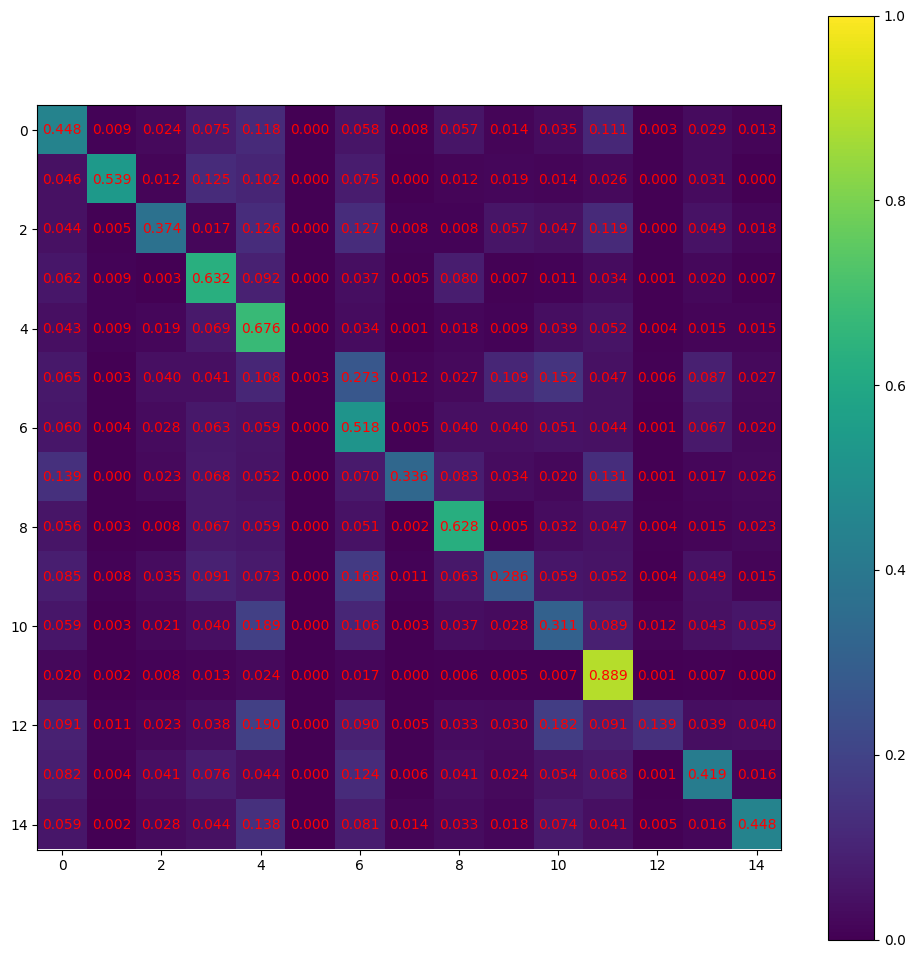

In [166]:
plot_class(d_train,l_train)

251/251 [==============================] - 0s 612us/step


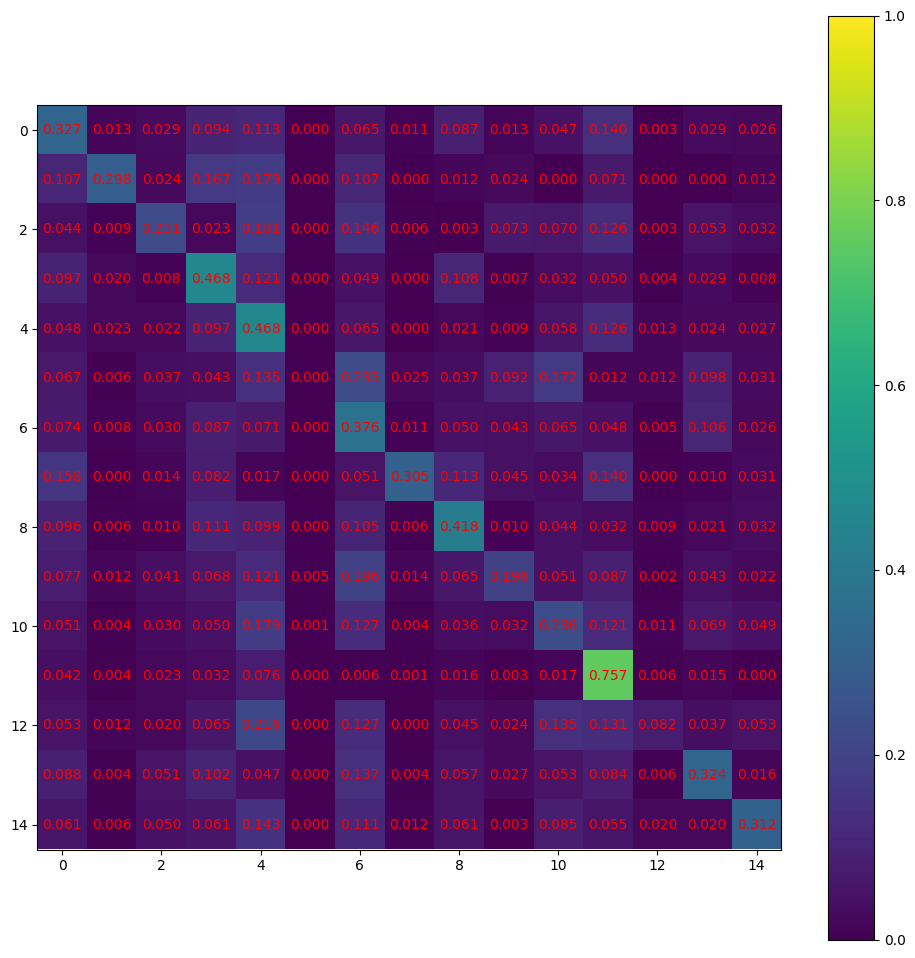

In [167]:
plot_class(d_test,l_test)

500/500 [==============================] - 0s 605us/step


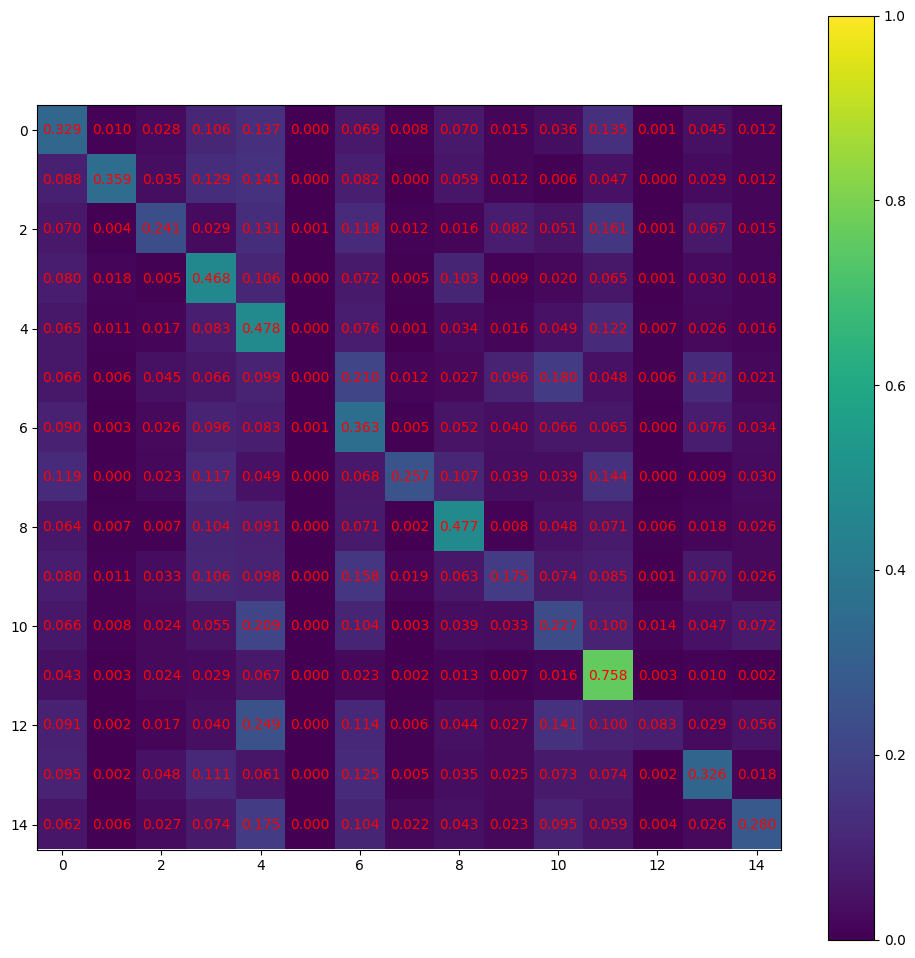

In [168]:
plot_class(d_val,l_val)

In [169]:
la = 1000
d_train, l_train = concatenate_last(data_train, label_train, la)
d_test, l_test = concatenate_last(data_test, label_test, la)
d_val, l_val = concatenate_last(data_val, label_val, la)
d_train, l_train = tf.convert_to_tensor(d_train), tf.convert_to_tensor(l_train)
d_test, l_test = tf.convert_to_tensor(d_test), tf.convert_to_tensor(l_test)
d_val, l_val = tf.convert_to_tensor(d_val), tf.convert_to_tensor(l_val)

4613/4613 [==============================] - 3s 611us/step


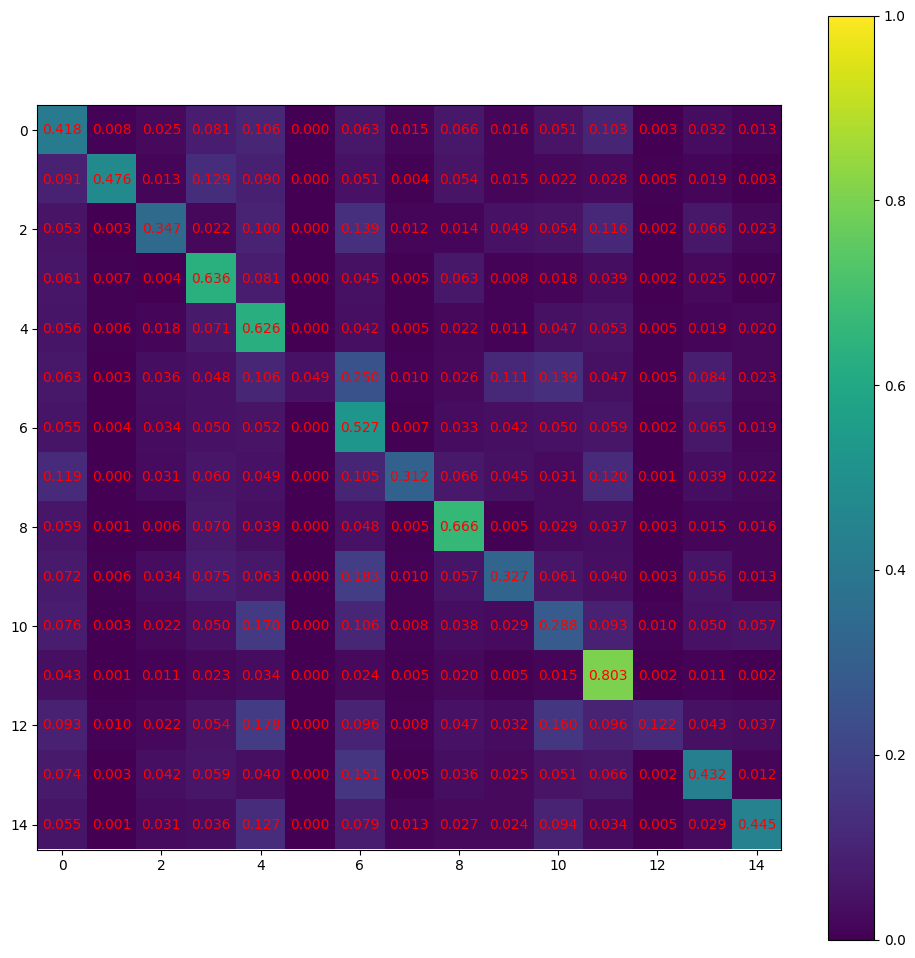

In [170]:
plot_class(d_train,l_train)

1300/1300 [==============================] - 1s 591us/step


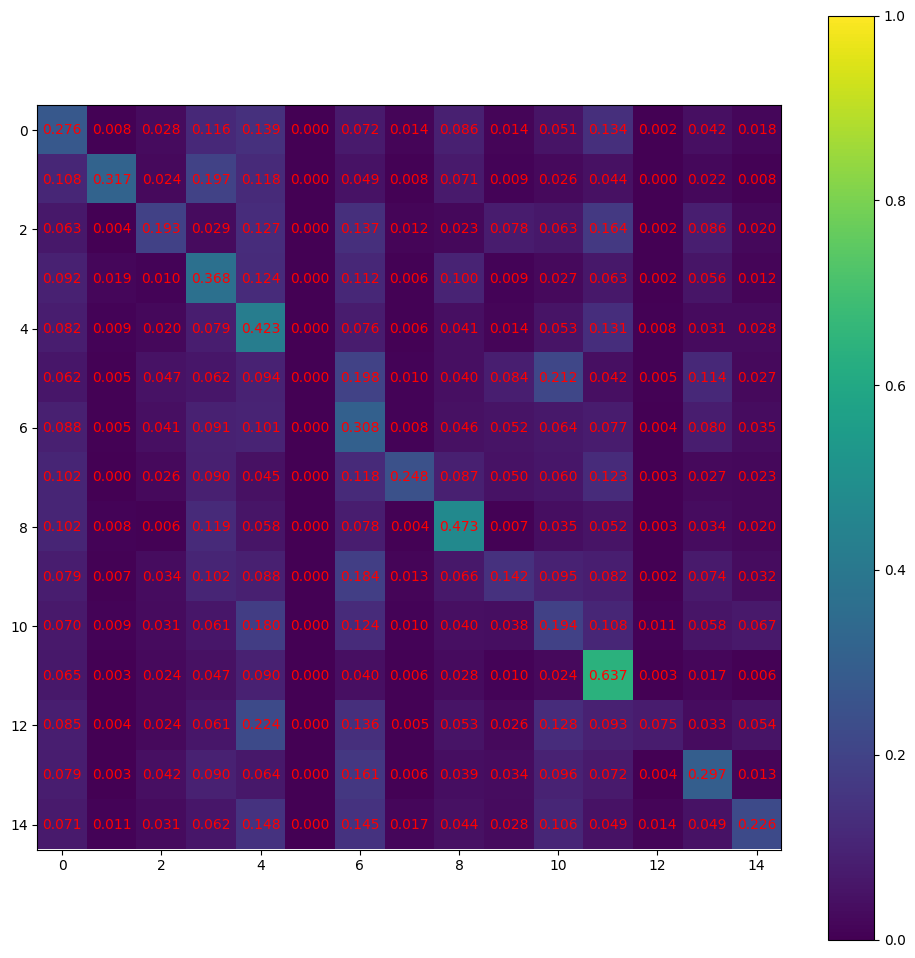

In [171]:
plot_class(d_val,l_val)

667/667 [==============================] - 0s 594us/step


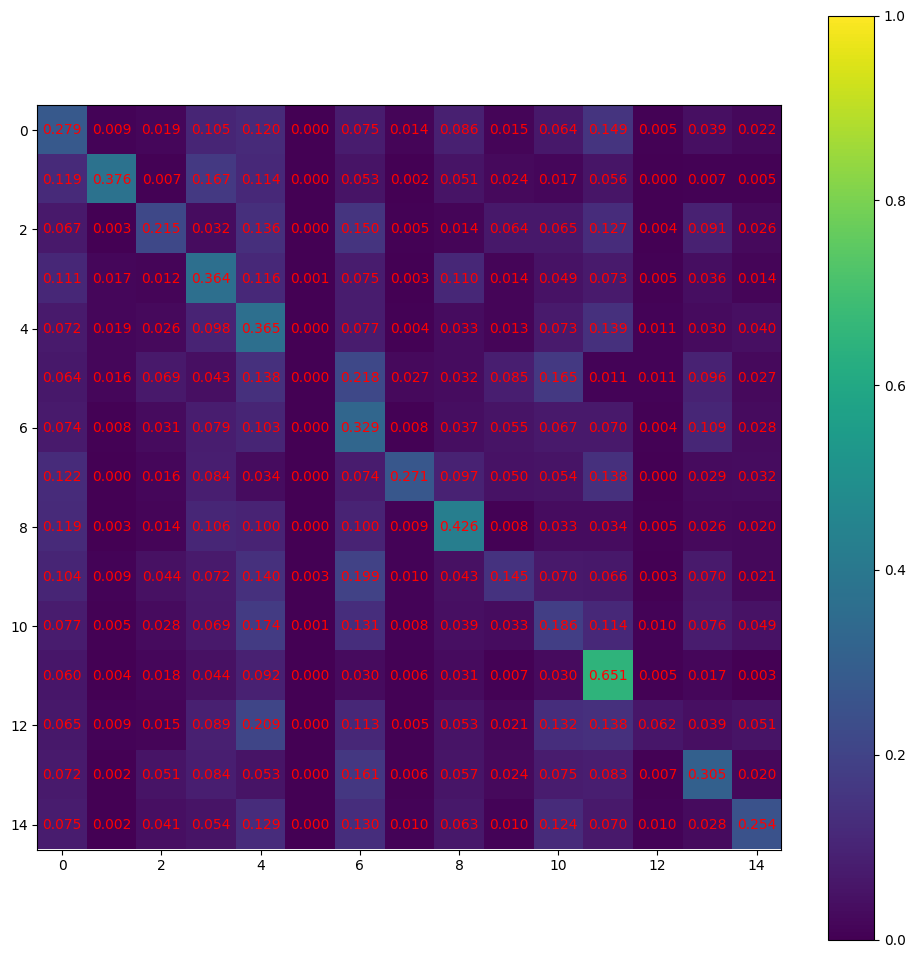

In [172]:
plot_class(d_test,l_test)

In [173]:
model.save('model_goodfix_1000-02.keras')